In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
keras.__version__

'2.12.0'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

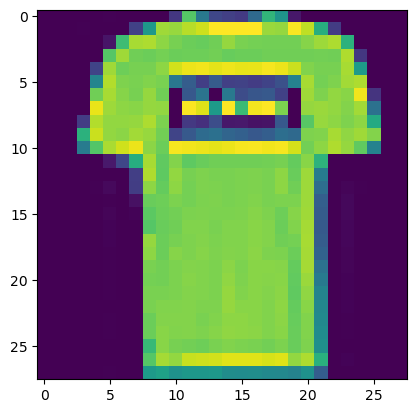

In [7]:
plt.imshow(X_train[1])

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
X_train_n = X_train/255.
X_test_n = X_test/255.

In [10]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]
X_test = X_test_n

In [11]:
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [20]:
weights, biases = model.layers[1].get_weights()

In [21]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [22]:
model_history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7199 - accuracy: 0.7666 - val_loss: 0.5254 - val_accuracy: 0.8244
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4926 - accuracy: 0.8279 - val_loss: 0.4426 - val_accuracy: 0.8484
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4469 - accuracy: 0.8423 - val_loss: 0.5482 - val_accuracy: 0.8010
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4201 - accuracy: 0.8535 - val_loss: 0.4014 - val_accuracy: 0.8628
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4015 - accuracy: 0.8594 - val_loss: 0.3865 - val_accuracy: 0.8660
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3826 - accuracy: 0.8645 - val_loss: 0.3779 - val_accuracy: 0.8694
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3702 - accuracy: 0.8700 - val_loss: 0.3684 - val_accuracy:

In [23]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [24]:
model_history.history

{'loss': [0.7198845148086548,
  0.4926266074180603,
  0.4468616545200348,
  0.42013004422187805,
  0.4014803171157837,
  0.38263750076293945,
  0.37017905712127686,
  0.35813331604003906,
  0.34721308946609497,
  0.33770766854286194,
  0.3288789987564087,
  0.31909775733947754,
  0.31225982308387756,
  0.30546021461486816,
  0.2977111041545868,
  0.2925567030906677,
  0.28656530380249023,
  0.2803233563899994,
  0.275789737701416,
  0.26982489228248596,
  0.26467153429985046,
  0.26016271114349365,
  0.25578436255455017,
  0.2510403096675873,
  0.24674101173877716,
  0.24190759658813477,
  0.23857980966567993,
  0.2347594052553177,
  0.23054265975952148,
  0.22647444903850555],
 'accuracy': [0.7666000127792358,
  0.8279454708099365,
  0.8422909379005432,
  0.8534545302391052,
  0.8594181537628174,
  0.8644909262657166,
  0.8700181841850281,
  0.8733999729156494,
  0.8772727251052856,
  0.8812545537948608,
  0.8810545206069946,
  0.885418176651001,
  0.8881999850273132,
  0.889709115028

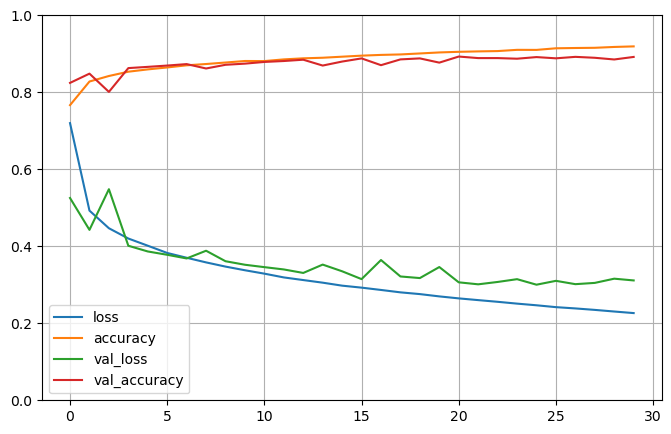

In [25]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [26]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3391 - accuracy: 0.8833


[0.33905836939811707, 0.8833000063896179]

In [27]:
X_new = X_test[:3]

In [28]:
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 128ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.02, 0.  , 0.96],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [30]:
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 34ms/step


array([[6.0837249e-07, 3.9096633e-08, 6.7168326e-06, 6.1500077e-06,
        4.3307205e-06, 1.9140052e-02, 2.8424074e-06, 2.1902908e-02,
        3.8218198e-04, 9.5855409e-01],
       [7.8204394e-05, 3.8445851e-08, 9.8459178e-01, 9.6755592e-08,
        1.5004185e-02, 4.3187509e-08, 3.2485565e-04, 5.0274468e-10,
        7.0994753e-07, 3.4149439e-10],
       [4.3847822e-06, 9.9999356e-01, 7.9622666e-08, 1.4935467e-06,
        4.0197457e-07, 3.4058346e-11, 2.2063190e-08, 6.7776752e-12,
        1.5217969e-09, 3.0941040e-12]], dtype=float32)